In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\temp\pmd_out\without_tests_ncss_gt6.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df

,File,method_name,npath,cyclo,ncss,Line,cognitive
0,/dataset/01/Anuken/Mindustry/android/src/mindu...,checkFiles,38.0,6.0,21.0,195,31.0
1,/dataset/01/Anuken/Mindustry/android/src/mindu...,onCreate,5100.0,6.0,20.0,39,66.0
2,/dataset/01/Anuken/Mindustry/android/src/mindu...,onRequestPermissionsResult,13.0,6.0,11.0,180,10.0
3,/dataset/01/Anuken/Mindustry/android/src/mindu...,defineClass,3.0,4.0,15.0,108,2.0
4,/dataset/01/Anuken/Mindustry/android/src/mindu...,enter,6.0,5.0,13.0,32,4.0
...,...,...,...,...,...,...,...
293568,/dataset/01/zxing/zxing/zxingorg/src/main/java...,isBanned,3.0,3.0,8.0,73,6.0
293569,/dataset/01/zxing/zxing/zxingorg/src/main/java...,isBanned,4.0,3.0,10.0,65,2.0
293570,/dataset/01/zxing/zxing/zxingorg/src/main/java...,doFilter,2.0,2.0,8.0,37,2.0
293571,/dataset/01/zxing/zxing/zxingorg/src/main/java...,arrayToString,4.0,4.0,16.0,32,5.0


In [3]:
# df = df[df.method_name.str.upper().str.find('INIT') < 0]
# df = df[(df['ncss'] < 100) & (df['ncss'] > 9)]
df = df[~df['method_name'].str[0].str.isupper()]
df = df[df['method_name'] != 'main']
df

,File,method_name,npath,cyclo,ncss,Line,cognitive
0,/dataset/01/Anuken/Mindustry/android/src/mindu...,checkFiles,38.0,6.0,21.0,195,31.0
1,/dataset/01/Anuken/Mindustry/android/src/mindu...,onCreate,5100.0,6.0,20.0,39,66.0
2,/dataset/01/Anuken/Mindustry/android/src/mindu...,onRequestPermissionsResult,13.0,6.0,11.0,180,10.0
3,/dataset/01/Anuken/Mindustry/android/src/mindu...,defineClass,3.0,4.0,15.0,108,2.0
4,/dataset/01/Anuken/Mindustry/android/src/mindu...,enter,6.0,5.0,13.0,32,4.0
...,...,...,...,...,...,...,...
293568,/dataset/01/zxing/zxing/zxingorg/src/main/java...,isBanned,3.0,3.0,8.0,73,6.0
293569,/dataset/01/zxing/zxing/zxingorg/src/main/java...,isBanned,4.0,3.0,10.0,65,2.0
293570,/dataset/01/zxing/zxing/zxingorg/src/main/java...,doFilter,2.0,2.0,8.0,37,2.0
293571,/dataset/01/zxing/zxing/zxingorg/src/main/java...,arrayToString,4.0,4.0,16.0,32,5.0


In [4]:
df_ncss = df.groupby('ncss')

In [5]:
vals = []
for _, x in df_ncss:
    vals.append(tuple([x["cognitive"].std(), x["cyclo"].std(), x["Line"].std(), _]))
    print(f'''for ncss {_} 
          cognitive {x["cognitive"].min()}  {x["cognitive"].max()}
          cyclo {x["cyclo"].min()} {x["cyclo"].max()} 
          Line {x["Line"].min()} {x["Line"].max()} {x["Line"].median()}''')
#     print(f'for ncss {_} cognitive {x["cognitive"].std()} cyclo {x["cyclo"].std()} Line {x["Line"].std()}')
# for x in sorted(vals, key=lambda x: (x[0], -x[3], x[1], x[2])):
#     print(int(x[3]), x[0], x[1], x[2])


for ncss 7.0 
          cognitive 1.0  167.0
          cyclo 1.0 22.0 
          Line 4 43031 154.0
for ncss 8.0 
          cognitive 1.0  173.0
          cyclo 1.0 60.0 
          Line 4 37910 188.0
for ncss 9.0 
          cognitive 1.0  214.0
          cyclo 1.0 35.0 
          Line 4 37222 201.0
for ncss 10.0 
          cognitive 1.0  238.0
          cyclo 1.0 20.0 
          Line 2 43743 217.0
for ncss 11.0 
          cognitive 1.0  157.0
          cyclo 1.0 21.0 
          Line 2 42665 208.0
for ncss 12.0 
          cognitive 1.0  161.0
          cyclo 1.0 21.0 
          Line 4 43837 257.0
for ncss 13.0 
          cognitive 1.0  59.0
          cyclo 1.0 25.0 
          Line 2 41419 261.0
for ncss 14.0 
          cognitive 1.0  111.0
          cyclo 1.0 25.0 
          Line 4 43384 230.0
for ncss 15.0 
          cognitive 1.0  96.0
          cyclo 1.0 28.0 
          Line 4 43279 233.0
for ncss 16.0 
          cognitive 1.0  161.0
          cyclo 1.0 36.0 
          Line 4 39557 2

for ncss 98.0 
          cognitive 6.0  117.0
          cyclo 1.0 61.0 
          Line 44 3245 333.0
for ncss 99.0 
          cognitive 10.0  147.0
          cyclo 1.0 62.0 
          Line 39 5546 168.0
for ncss 100.0 
          cognitive 13.0  174.0
          cyclo 1.0 71.0 
          Line 30 2513 217.0
for ncss 101.0 
          cognitive 1.0  219.0
          cyclo 1.0 81.0 
          Line 48 5507 357.0
for ncss 102.0 
          cognitive 1.0  206.0
          cyclo 1.0 91.0 
          Line 67 1738 236.0
for ncss 103.0 
          cognitive 8.0  133.0
          cyclo 1.0 89.0 
          Line 46 4615 227.0
for ncss 104.0 
          cognitive 1.0  280.0
          cyclo 1.0 132.0 
          Line 31 2731 221.0
for ncss 105.0 
          cognitive 12.0  163.0
          cyclo 1.0 71.0 
          Line 42 1236 201.0
for ncss 106.0 
          cognitive 1.0  156.0
          cyclo 12.0 71.0 
          Line 51 38994 527.5
for ncss 107.0 
          cognitive 1.0  192.0
          cyclo 1.0 91.0 
     

for ncss 185.0 
          cognitive 79.0  228.0
          cyclo 1.0 66.0 
          Line 49 1276 311.0
for ncss 186.0 
          cognitive 100.0  153.0
          cyclo 52.0 71.0 
          Line 71 1959 321.0
for ncss 187.0 
          cognitive 69.0  148.0
          cyclo 1.0 77.0 
          Line 153 1088 462.0
for ncss 188.0 
          cognitive 78.0  297.0
          cyclo 45.0 96.0 
          Line 182 929 506.0
for ncss 189.0 
          cognitive 28.0  255.0
          cyclo 1.0 75.0 
          Line 84 763 277.0
for ncss 190.0 
          cognitive 76.0  379.0
          cyclo 47.0 83.0 
          Line 283 1252 669.0
for ncss 191.0 
          cognitive 41.0  216.0
          cyclo 1.0 82.0 
          Line 87 3595 1066.0
for ncss 192.0 
          cognitive 35.0  313.0
          cyclo 1.0 126.0 
          Line 116 455 340.0
for ncss 193.0 
          cognitive 138.0  225.0
          cyclo 1.0 85.0 
          Line 200 3332 600.0
for ncss 194.0 
          cognitive 48.0  138.0
          cyclo 

          Line 525 1525 1025.0
for ncss 331.0 
          cognitive 88.0  88.0
          cyclo 112.0 112.0 
          Line 1312 1312 1312.0
for ncss 333.0 
          cognitive 379.0  379.0
          cyclo 134.0 134.0 
          Line 347 347 347.0
for ncss 334.0 
          cognitive 253.0  253.0
          cyclo 105.0 105.0 
          Line 1914 1914 1914.0
for ncss 336.0 
          cognitive 172.0  172.0
          cyclo 124.0 124.0 
          Line 108 108 108.0
for ncss 340.0 
          cognitive 82.0  82.0
          cyclo 95.0 95.0 
          Line 145 145 145.0
for ncss 347.0 
          cognitive 72.0  72.0
          cyclo 107.0 107.0 
          Line 998 998 998.0
for ncss 349.0 
          cognitive 251.0  251.0
          cyclo 118.0 118.0 
          Line 2753 2753 2753.0
for ncss 351.0 
          cognitive 70.0  70.0
          cyclo 32.0 32.0 
          Line 4407 4407 4407.0
for ncss 353.0 
          cognitive 399.0  399.0
          cyclo 145.0 145.0 
          Line 536 536 536.0
for nc

In [6]:
from numpy import mean
import itertools
import operator
import functools
# {ncss} : {n times}
v = {13: 20, 24: 10, 20: 10, 29: 10, 55: 4, 16: 20, 19: 10, 26: 20, 97: 1}
v = {13: 4, 20: 4, 21: 4, 22: 4,  23: 4, 24: 4, 16: 4, 19: 4, 26: 4, 37:4, 30:4, 40:4}
v = {x:7 for x, y in v.items()}
all_items = functools.reduce(operator.concat, [list(itertools.repeat(x, y)) for x, y in v.items()])
mean(all_items)

24.25

In [6]:
# arr = [13,24,20,29,55,16,19, 26, 97]
arr = v.keys()
df_new = df.loc[df['ncss'].isin(arr)]
df_new

NameError: name 'v' is not defined

In [8]:
max_vals = {}
for ncss, x in df_new.groupby('ncss'):
    cog_min = x['cognitive'].min()
    cog_max = x['cognitive'].max()
    cc_min = x['cyclo'].min()
    cc_max = x['cyclo'].max()
    line_med = int(x['Line'].median())
    cyclo_m = int(x['cyclo'].median())
    cognitive_m = int(x['cognitive'].median())
#      {x['cyclo'] == cc_min}
#     {x['cognitive'] == cog_min} {x['cognitive'] == cog_max}
#     {x['Line'] == Line_med}
#  {x[x['cyclo'] == cc_max].shape[0]}
    cog_min_count = df[(df['ncss'] == ncss) & (df['cognitive'] == cog_min)]
    cog_max_count = df[(df['ncss'] == ncss) & (df['cognitive'] == cog_max)]
    cc_mix_count = df[(df['ncss'] == ncss) & (df['cyclo'] == cc_min)]
    cc_max_count = df[(df['ncss'] == ncss) & (df['cyclo'] == cc_max)]
    line_med_count = df[(df['ncss'] == ncss) & (df['Line'] == line_med)]
    line_cyclo_m_count = df[(df['ncss'] == ncss) & (df['cyclo'] == cyclo_m)]
    line_cognitive_m_count = df[(df['ncss'] == ncss) & (df['cognitive'] == cognitive_m)]
#     max_vals[ncss] = {'cog_mix_count': cog_mix_count.shape[0], 'cog_max_count': cog_max_count.shape[0], 
#     cc_mix_count: cc_max_count.shape[0], cc_max_count: cc_max_count.shape[0]: line_med_count {line_med_count.shape[0]}}
    print(f'''
    ncss {ncss} cog_min_count {cog_min_count.shape[0]} cog_max_count {cog_max_count.shape[0]} 
    cc_mix_count {cc_max_count.shape[0]} cc_max_count {cc_max_count.shape[0]} line_med_count {line_med_count.shape[0]} line_med_val {line_med}
    line_cyclo_m_count {line_cyclo_m_count.shape[0]} line_cognitive_m_count {line_cognitive_m_count.shape[0]}
    ''')


    ncss 13.0 cog_min_count 932 cog_max_count 2 
    cc_mix_count 1 cc_max_count 1 line_med_count 19 line_med_val 267
    line_cyclo_m_count 2466 line_cognitive_m_count 1662
    

    ncss 16.0 cog_min_count 590 cog_max_count 1 
    cc_mix_count 1 cc_max_count 1 line_med_count 11 line_med_val 223
    line_cyclo_m_count 1358 line_cognitive_m_count 947
    

    ncss 19.0 cog_min_count 220 cog_max_count 1 
    cc_mix_count 1 cc_max_count 1 line_med_count 9 line_med_val 225
    line_cyclo_m_count 919 line_cognitive_m_count 430
    

    ncss 20.0 cog_min_count 219 cog_max_count 1 
    cc_mix_count 1 cc_max_count 1 line_med_count 6 line_med_val 220
    line_cyclo_m_count 728 line_cognitive_m_count 353
    

    ncss 21.0 cog_min_count 131 cog_max_count 1 
    cc_mix_count 1 cc_max_count 1 line_med_count 7 line_med_val 218
    line_cyclo_m_count 605 line_cognitive_m_count 291
    

    ncss 22.0 cog_min_count 137 cog_max_count 1 
    cc_mix_count 1 cc_max_count 1 line_med_count 6 line_med_

In [7]:
from pathlib import Path
from program_slicing.graph.parse import LANG_JAVA, tree_sitter_ast, parse
import operator
from functools import reduce
import pandas as pd

from program_slicing.graph.parse.tree_sitter_parsers import node_name
from program_slicing.graph.parse import cdg_java
# cdg_java.__parse_statement_name
from program_slicing.graph.parse import tree_sitter_parsers
from veniq.utils.encoding_detector import read_text_with_autodetected_encoding

default_dir = r'D:\temp\dataset_colelction_refactoring\old_raw_dataset.tar\old_raw_dataset'
folder_to_save = Path(r'D:\git\program_slicing2\dataset')
if not folder_to_save.exists():
    folder_to_save.mkdir(parents=True)

def __parse_statement_name(source_code_bytes: bytes, ast):
    if ast.type == "variable_declarator":
        return __parse_statement_name(source_code_bytes, ast.child_by_field_name("name"))
    elif ast.type == "assignment_expression":
        return __parse_statement_name(source_code_bytes, ast.child_by_field_name("left"))
    elif ast.type == "update_expression":
        expr_ast = ast.children[0]
        expr_ast = expr_ast if expr_ast.next_named_sibling is None else expr_ast.next_named_sibling
        return __parse_statement_name(source_code_bytes, expr_ast)
    elif ast.type == "catch_formal_parameter":
        return __parse_statement_name(source_code_bytes, ast.child_by_field_name("name"))
    elif ast.start_point[0] == ast.end_point[0]:
        return source_code_bytes[ast.start_byte: ast.end_byte].decode("utf8")
    return None

def get_function_nodes(root):
    for ast, level in traverse_ast(root):
        if ast.type == "method_declaration":
            yield ast

def traverse_ast(root, level=0):
    for child in root.children:
        for ast_and_level in traverse_ast(child, level + 1):
            yield ast_and_level
    yield root, level
    
def traverse(root):
    yield root
    if root.children:
        for child in root.children:
            for result in traverse(child):
                yield result
parse_node_name = __parse_statement_name

In [8]:
def find_method(filepath, x, text):
    method_name = x['method_name']
    ast = parse.tree_sitter_ast(text, LANG_JAVA).root_node
    bytes_f = bytes(text, 'utf-8')
    folder_to_save = Path(r"D:\git\program_slicing2\dataset")
    if not folder_to_save.exists():
        folder_to_save.mkdir(parents=True)
    for function_node in get_function_nodes(ast):
        function_name = parse_node_name(bytes_f, function_node.child_by_field_name("name"))
        if method_name == function_name:
#         print(filepath, method_name, function_node.start_point[0], function_name)
            method_code = bytes_f[function_node.start_byte: function_node.end_byte].decode("utf8")
            ncss = x['ncss']
            cyclo = x['cyclo']
            cog = x['cognitive']
            lines_number = len(method_code.split('\n')) - 1
            # print(node, node_name(bytes(text, 'utf-8'), node))
            old_java_file_name = Path(x['File']).stem
            p = Path(f"{old_java_file_name}_{method_name}_{ncss}_{cyclo}_{cog}_{lines_number}.java")
            file_name = folder_to_save / p
#             print(f'saving to {file_name}')
            with open(file_name, 'w', encoding='utf-8') as w:
                w.write(method_code)
            return {'File': file_name, 
             'filename': old_java_file_name, 
             'method_name': method_name,
             'ncss': ncss, 
             'cognitive': cog,
             'cyclo': cyclo,
             'Line': lines_number}
    
        
def save_to_file_and_save_df(item, dataset_df):
#     print(item)
    filepath = item.File
    replaced_path = filepath.replace(r'/dataset/01/', "")
    replaced_path = Path(default_dir, replaced_path)
#     print(f'{replaced_path}')
    text = read_text_with_autodetected_encoding(replaced_path)
    d = find_method(replaced_path, item, text)
    return d

def run(filtered_df, df_new, dataset):
#     print(dataset.shape[0])
    dataset_df = pd.DataFrame(columns=df_new.columns)
    for _, item in filtered_df.iterrows():
        dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset), ignore_index=True)
    nn = dataset_df.append(dataset, ignore_index=True)
    print(nn[['File', 'method_name']].values)
    return nn


# for ncss, x in df_new.groupby('ncss'):
#     cog_min = x['cognitive'].min()
#     cog_median = int(x['cognitive'].median())
#     cog_max = x['cognitive'].max()
#     cc_min = x['cyclo'].min()
#     cc_max = x['cyclo'].max()
#     cc_median = int(x['cyclo'].median())
#     line_med = int(x['Line'].median())
#     print(ncss)
# #     samples_precounted = v.get(ncss, 0)
#     cog_mix_count = df[(df['ncss'] == ncss) & (df['cognitive'] == cog_min)].sample()
#     cog_max_count = df[(df['ncss'] == ncss) & (df['cognitive'] == cog_max)].sample()
#     cc_mix_count = df[(df['ncss'] == ncss) & (df['cyclo'] == cc_min)].sample()
#     cc_max_count = df[(df['ncss'] == ncss) & (df['cyclo'] == cc_max)].sample()
#     line_med_count = pd.DataFrame()
#     while not line_med_count.empty:
#         line_med_count = df[(df['ncss'] == ncss) & (df['Line'] == line_med)].sample()
#         line_med-=1
        
#     line_cog_median = df[(df['ncss'] == ncss) & (df['cognitive'] == cog_median)].sample()
#     line_cc_median = df[(df['ncss'] == ncss) & (df['cyclo'] == cc_median)].sample()
# #     cc_median = x['cyclo'].median()
    
#     new_dataset_df = pd.DataFrame(columns=df_new.columns)
#     new_dataset_df = run(cog_mix_count, df_new, new_dataset_df)
#     new_dataset_df = run(cog_max_count, df_new, new_dataset_df)
#     new_dataset_df = run(cc_mix_count, df_new, new_dataset_df)
#     new_dataset_df = run(cc_max_count, df_new, new_dataset_df)
#     new_dataset_df = run(line_med_count, df_new, new_dataset_df)
#     new_dataset_df = run(line_cog_median, df_new, new_dataset_df)
#     new_dataset_df = run(line_cc_median, df_new, new_dataset_df)
    
# #     for _, item in cog_max_count.iterrows():
# #         dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset_df), ignore_index=True)
# #     for _, item in cc_mix_count.iterrows():
# #         dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset_df), ignore_index=True)
# #     for _, item in cc_max_count.iterrows():
# #         dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset_df), ignore_index=True)
# #     for _, item in line_med_count.iterrows():
# #         dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset_df), ignore_index=True)
# #     for _, item in line_cog_median.iterrows():
# #         dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset_df), ignore_index=True)
# #     for _, item in line_cc_median.iterrows():
# #         dataset_df = dataset_df.append(save_to_file_and_save_df(item, dataset_df), ignore_index=True)
# dataset_df.sort_values('ncss').to_csv('dataset_BC.csv')
# print(dataset_df['ncss'].mean())
# print('saved')
# #     print(f'ncss {cog_mix_count[["method_name", "File"]]}')
# #     print(f'''
# #     ncss {ncss} 
# #     cog_mix_count {cog_mix_count.sample(1)["method_name"]} 
# #     cog_max_count {cog_max_count.sample(1)["method_name"]} 
# #     cc_mix_count {cc_max_count.sample(1)["method_name"]} 
# #     cc_max_count {cc_max_count.sample(1)["method_name"]} 
# #     line_med_count {line_med_count.sample(1)["method_name"]}
# #     ''')

In [10]:
df_new = df

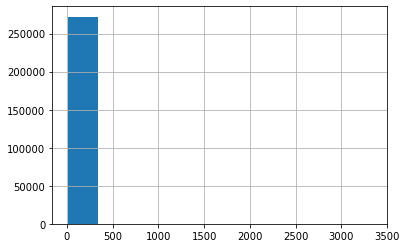

In [13]:
from sklearn.model_selection import train_test_split
from numpy import mean, median
y = df_new['ncss']

df_new['ncss'].hist()

In [19]:
# ncss_15_45 = df_new[(df_new['ncss'] > 20) & (df_new['ncss'] < 45)]
ncss_15_45 = df_new[(df_new['ncss'] > 77) & (df_new['ncss'] < 150)]
mean(ncss_15_45['ncss'])

100.2800506115563

In [23]:
ncss_15_45
y = ncss_15_45['ncss']
y.shape[0]

2371

In [25]:
# 15 / ncss_15_45.shape[0]

0.0063264445381695485

In [31]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(ncss_15_45,y,test_size=0.006,stratify=y)
# X_test
X_test = df_new[df_new['ncss'] == 100].sort_values(by=['cyclo'])
X_test

,File,method_name,npath,cyclo,ncss,Line,cognitive
150533,/dataset/01/apache/netbeans/java/java.examples...,initComponents,1.000000e+00,1.0,100.0,92,NaN
122124,/dataset/01/apache/netbeans/ide/db.dataview/sr...,initComponents,1.000000e+00,1.0,100.0,163,NaN
105036,/dataset/01/apache/netbeans/apisupport/apisupp...,initComponents,1.000000e+00,1.0,100.0,189,NaN
273858,/dataset/01/prestodb/presto/presto-main/src/ma...,setup,1.000000e+00,1.0,100.0,178,NaN
106960,/dataset/01/apache/netbeans/contrib/websvc.wsi...,generateProviderImplClass,4.000000e+02,6.0,100.0,206,16.0
122139,/dataset/01/apache/netbeans/ide/db.dataview/sr...,initialDataLoad,9.590400e+04,7.0,100.0,79,58.0
134965,/dataset/01/apache/netbeans/ide/schema2beans/s...,genConstructor,4.080000e+02,11.0,100.0,190,16.0
162612,/dataset/01/apache/netbeans/nbi/engine/src/org...,initialize,6.912000e+03,15.0,100.0,185,25.0
161947,/dataset/01/apache/netbeans/nbbuild/installer/...,initComponents,3.328000e+03,25.0,100.0,805,43.0
73108,/dataset/01/alibaba/nacos/naming/src/main/java...,doSrvIPXT,3.991680e+05,26.0,100.0,428,38.0


In [32]:
mean(X_test['ncss'])

100.0

d:\git\program_slicing\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
d:\git\program_slicing\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
d:\git\program_slicing\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
d:\git\program_slicing\venv\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002376E8B2820>,
      dtype=object)

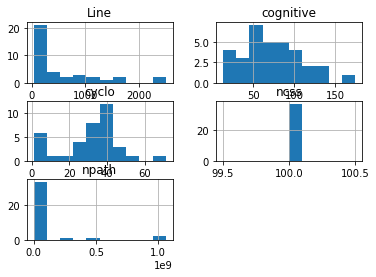

In [33]:
X_test.hist()

In [34]:
new_dataset_df = pd.DataFrame(df_new.columns)
for _, item in X_test.iterrows():
    new_dataset_df = new_dataset_df.append(save_to_file_and_save_df(item, None), ignore_index=True)
new_dataset_df.sort_values('ncss').to_csv('dataset_BC.csv')
print(new_dataset_df['ncss'].mean())
print('saved')

100.0
saved
